# Predictive task description

Here are the steps:

    1. Prepare predictive model(s) of default. Default client is defined as one with loan_status variable taking on the following levels:
    Charged Off
    Default
    Does not meet the credit policy. Status:Charged Off
    Late (31-120 days)

    2. Present a few competing predictive models and select one of them. Explain criteria for the selection.

    3. Calculate performance metrics you find important in this specific context, but also provide necessarily ROC graphs and AUC for comparison purposes. Metrics should be based on testing set, which should consist 30% randomly selected clients from the original dataset.

    4. If necessary, make appropriate variables' pre-processing.

    5. Send us a programming code with comments and the report/presentation of main results.

We hope you will enjoy solving the task! Good luck!


# Final solution

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

the whole sample

In [ ]:
y_train = pd.read_csv('y_train.csv',header=None,names=['Default'])
X_train = pd.read_csv('X_train.csv')
y_test = pd.read_csv('y_test.csv',header=None,names=['Default'])
X_test = pd.read_csv('X_test.csv')

small sample (5%)

In [17]:
y_train = pd.read_csv('y_train_small.csv',header=None,names=['Default'])
X_train = pd.read_csv('X_train_small.csv')
y_test = pd.read_csv('y_test_small.csv',header=None,names=['Default'])
X_test = pd.read_csv('X_test_small.csv')

In [24]:
target = 'Default'

    plot function

In [46]:
def plotcurve(to_plot, lab, color):
    fpr, tpr, thresholds = metrics.roc_curve(y_test[target], to_plot[target])
    roc_auc_score = metrics.roc_auc_score(y_test[target], to_plot[target])
    curvelab = lab+' AUC=' + str(round(roc_auc_score,5))
    return plt.plot(fpr, tpr, label = curvelab, color=color)

# Comparison #1 of four classifiers:
        Logistic Regression
        Decision Tree
        Random Forest
        Gradient Boosting

In [54]:
DT1 = pd.read_csv("1DecisionTree_noLeakage.csv") # /no_leakage/alg21.csv
GB1 = pd.read_csv("1GradientBoosting_noLeakage.csv") # /no_leakage/alg41.csv
LR1 = pd.read_csv("1LogisticRegression_noLeakage.csv") # /no_leakage/alg14.csv
RF1 = pd.read_csv("1RandomForest_noLeakage.csv") # /no_leakage/alg31.csv

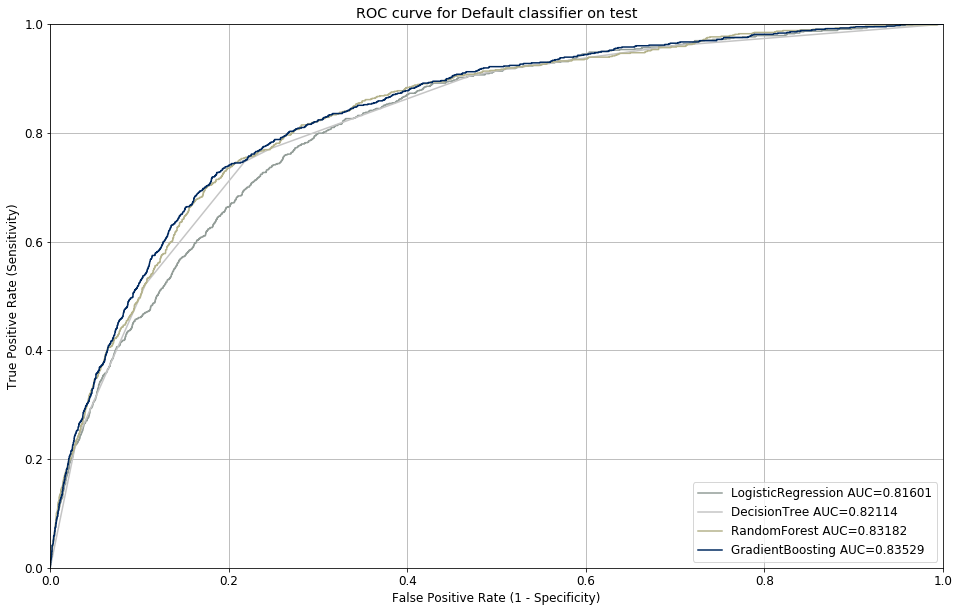

In [70]:
plt.figure(figsize=(16, 10))
plotcurve(LR1, 'LogisticRegression', '#939D98')
plotcurve(DT1, 'DecisionTree', '#C5C5C5')
plotcurve(RF1, 'RandomForest', '#B5B38C')
plotcurve(GB1, 'GradientBoosting', '#002960')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for '+ target + ' classifier on test')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.legend( loc='lower right')
plt.show()

# Comparison #2 of four classifiers:
        Logistic Regression
        Decision Tree
        Random Forest
        Gradient Boosting

In [59]:
DT2 = pd.read_csv("2DecisionTree_myFeaturesOn.csv") # /no_leakage/alg21.csv
GB2 = pd.read_csv("2GradientBoosting_myFeaturesOn.csv") # /no_leakage/alg41.csv
LR2 = pd.read_csv("2LogisticRegression_myFeaturesOn.csv") # /no_leakage/alg14.csv
RF2 = pd.read_csv("2RandomForest_myFeaturesOn.csv") # /no_leakage/alg31.csv

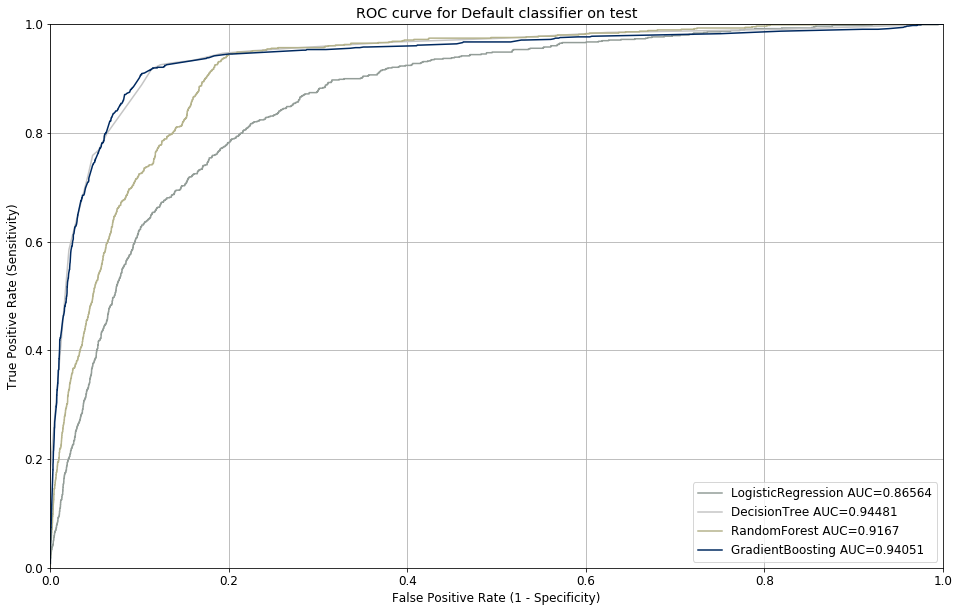

In [72]:
plt.figure(figsize=(16, 10))
plotcurve(LR2, 'LogisticRegression', '#939D98')
plotcurve(DT2, 'DecisionTree', '#C5C5C5')
plotcurve(RF2, 'RandomForest', '#B5B38C')
plotcurve(GB2, 'GradientBoosting', '#002960')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for '+ target + ' classifier on test')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.legend( loc='lower right')
plt.show()

# Comparison #3 of four classifiers:
        Logistic Regression
        Decision Tree
        Random Forest
        Gradient Boosting

In [61]:
DT3 = pd.read_csv("3DecisionTree_LeakageOn.csv") # /no_leakage/alg21.csv
GB3 = pd.read_csv("3GradientBoosting_LeakageOn.csv") # /no_leakage/alg41.csv
LR3 = pd.read_csv("3LogisticRegression_LeakageOn.csv") # /no_leakage/alg14.csv
RF3 = pd.read_csv("3RandomForest_LeakageOn.csv") # /no_leakage/alg31.csv

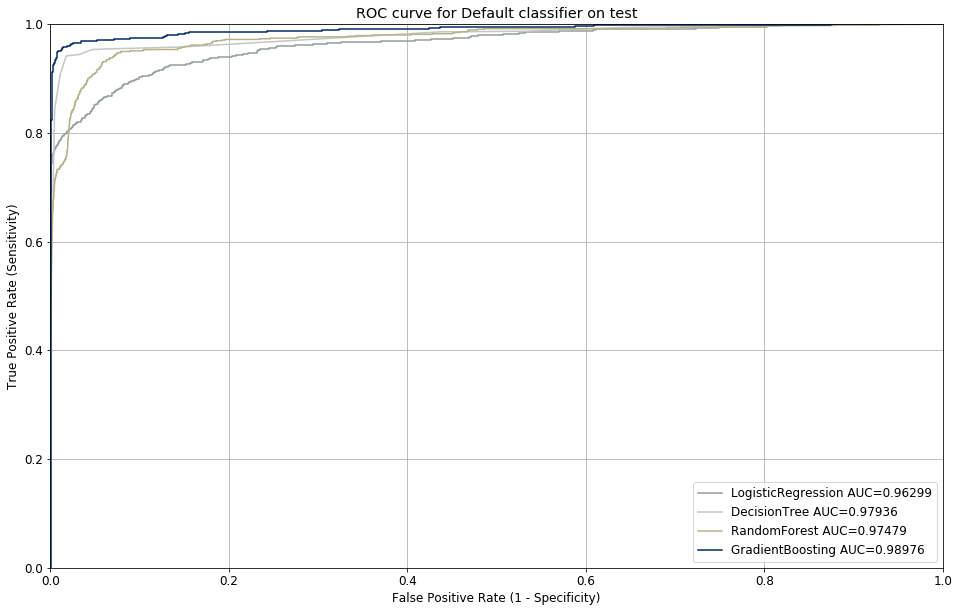

In [71]:
plt.figure(figsize=(16, 10))
plotcurve(LR3, 'LogisticRegression', '#939D98')
plotcurve(DT3, 'DecisionTree', '#C5C5C5')
plotcurve(RF3, 'RandomForest', '#B5B38C')
plotcurve(GB3, 'GradientBoosting', '#002960')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for '+ target + ' classifier on test')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.legend( loc='lower right')
plt.show()